# Figure S15: Comparisons of all model-based parameters between the two slowest speeds

## setup and imports

In [1]:

import fnmatch
import matplotlib.pyplot as plt
import numpy as np
import glob
import pickle

from sessionlists import (dist60, dist90, dist120, TM20, TM10, TM2, TMrev2, TMrev10, TMrev20)
from utils import *
from plotting import *
from model_functions import *

plt.style.use('./Figures/paper.mplstyle')

In [2]:
# Define folder with data
root = "/home/thomas/Desktop/ALLDATA"

print("Path to data is: %s"%root)
print(f'Found {len(glob.glob(root+"/*"))} rats in the data folder')

Path to data is: /home/thomas/Desktop/ALLDATA
Found 34 rats in the data folder


In [3]:
rat_markers = {}
params = {}
sequence = {}


# RATS
animalList = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
              'RatF30', 'RatF31', 'RatF32', 'RatF33', 'RatM30', 'RatM31', 'RatM32', 
              'RatF40', 'RatF41', 'RatF42', 'RatM40', 'RatM41', 'RatM42', 'RatM43', 
                'RatF50', 'RatF51', 'RatF52', 'RatM50', 'RatM51', 'RatM52', 'RatM53', 'RatM54']

animalList = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
            'RatF32', 'RatF33', 'RatM31', 'RatM32', 'RatF42', 'RatM40', 'RatM43', 
            'RatM53', 'RatM54']

rat_markers = {}
m, f = 0, 0
male_palette = create_teal_palette(num_shades=len([x for x in animalList if 'M' in x]))
female_palette = create_blue_violet_palette(num_shades=len([x for x in animalList if 'F' in x]), start_intensity=80)

for index, animal in enumerate(animalList):
    if fnmatch.fnmatch(animal, 'RatF*'):
        rat_markers[animal]=[female_palette[f], 'o', ]
        f += 1
    elif fnmatch.fnmatch(animal, 'RatM*'):
        rat_markers[animal]=[male_palette[m], 'o', ]
        m += 1
    elif fnmatch.fnmatch(animal, 'Rat00*'):
        rat_markers[animal]=[(0.0, 0.0, 0.0), "$\u2426$",]
    else:
        print("error, this is not a rat you got here")

    # loop over all sessions for each rat and get the pickled preprocessed data. Data is processed in VIGOR_Preprocess.py
    # data (list or list of lists) for each variable is stored in a dictionary with keys (animal, session)
    for session in sorted(matchsession(animal, dist60+dist90+dist120 + TM20+TM10+TM2+TMrev2+TMrev10+TMrev20)):
        sequence[animal, session] = get_from_pickle(root, animal[0:6], session, name="sequence.p")
        params[animal, session]     = get_from_pickle(root, animal[0:6], session, name="params.p")


# Fit run and inter-run models to the -2/2 treadmill belt velocity data

In [4]:
# 2 vs-2 cm/s

if os.path.exists("picklejar/2andrev2FitIntactRats.p"):
    alpha, alpha_t, alpha_U, gamma, gamma_t, gamma_U, mu, mu_t, mu_U, sigma, sigma_t, sigma_U = pickle.load(open("picklejar/2andrev2FitIntactRats.p", "rb"))
else:
    data2IDLE = prepare_data_idle_times(sequence, animalList, TM2)
    datarev2IDLE = prepare_data_idle_times(sequence, animalList, TMrev2)
    data2RUN = prepare_data_running_times(sequence, animalList, TM2)
    datarev2RUN = prepare_data_running_times(sequence, animalList, TMrev2)



    alpha_t_fixed, gamma_t_fixed, alpha_U_fixed, gamma_U_fixed = False, False, False, False
    mu_t_fixed, sigma_t_fixed, mu_U_fixed, sigma_U_fixed = False, False, False, False

    alpha, gamma, alpha_t, gamma_t, alpha_U, gamma_U, lossWald = {}, {}, {}, {}, {}, {}, {}
    mu, mu_t, mu_U, sigma, sigma_t, sigma_U, loss = {}, {}, {}, {}, {}, {}, {}
    for animal in animalList:
        print(animal)
        alpha[animal] = {"2": 0, "rev2": 0}
        gamma[animal] = {"2": 0, "rev2": 0}
        alpha_t[animal] = {"2": 0, "rev2": 0}
        gamma_t[animal] = {"2": 0, "rev2": 0}
        alpha_U[animal] = {"2": 0, "rev2": 0}
        gamma_U[animal] = {"2": 0, "rev2": 0}
        lossWald[animal] = {"2": 0, "rev2": 0}

        mu[animal] = {"2": 0, "rev2": 0}
        sigma[animal] = {"2": 0, "rev2": 0}
        mu_t[animal] = {"2": 0, "rev2": 0}
        sigma_t[animal] = {"2": 0, "rev2": 0}
        mu_U[animal] = {"2": 0, "rev2": 0}
        sigma_U[animal] = {"2": 0, "rev2": 0}
        loss[animal] = {"2": 0, "rev2": 0}


        for cond, data in zip(["2", "rev2"], [data2IDLE, datarev2IDLE]):
            (alpha[animal][cond], theta, gamma[animal][cond], \
            alpha_t[animal][cond], thetaprime, gamma_t[animal][cond], \
            alpha_U[animal][cond], thetasecond, gamma_U[animal][cond]), lossWald[animal][cond] = modelwald_fit(data[animal], alpha_t_fixed=alpha_t_fixed, 
                                                                                                                            gamma_t_fixed=gamma_t_fixed, 
                                                                                                                            alpha_R_fixed=alpha_U_fixed, 
                                                                                                                            gamma_R_fixed=gamma_U_fixed)

        for cond, data in zip(["2", "rev2"], [data2RUN, datarev2RUN]):
            (mu[animal][cond], sigma[animal][cond], \
            mu_t[animal][cond], sigma_t[animal][cond], \
            mu_U[animal][cond], sigma_U[animal][cond]), loss[animal][cond] = modelrun_fit(data[animal], f=modelrun_crit,
                                                                                        mu_t_fixed=mu_t_fixed, 
                                                                                                        sigma_t_fixed=sigma_t_fixed, 
                                                                                                        mu_R_fixed=mu_U_fixed, 
                                                                                                        sigma_R_fixed=sigma_U_fixed)
            print(mu[animal][cond], sigma[animal][cond], 
            mu_t[animal][cond], sigma_t[animal][cond], 
            mu_U[animal][cond], sigma_U[animal][cond], loss[animal][cond])

    pickle.dump([alpha, alpha_t, alpha_U, gamma, gamma_t, gamma_U, mu, mu_t, mu_U, sigma, sigma_t, sigma_U,], open("picklejar/2andrev2FitIntactRats.p", "wb"))

In [5]:
alpha, alpha_t, alpha_U, gamma, gamma_t, gamma_U, mu, mu_t, mu_U, sigma, sigma_t, sigma_U = pickle.load(open("picklejar/2andrev2FitIntactRats.p", "rb"))


vars = [alpha, alpha_t, alpha_U, gamma, gamma_t, gamma_U, mu, mu_t, mu_U, sigma, sigma_t, sigma_U]
names = [r'$\alpha_0$', r'$\alpha_t$', r'$\alpha_U$', r'$\gamma_0$', r'$\gamma_t$', r'$\gamma_U$', r'$\mu_0$', r'$\mu_t$', r'$\mu_U$', r'$\sigma_0$', r'$\sigma_t$', r'$\sigma_U$']
yticks = [[0, 1, 2, 3], [0, .2, .4, .6], [-0.4, -0.2, 0, 0.2, 0.4],
        [0, 0.5, 1, 1.5, 2], [-0.2, -.1, 0, 0.1], [-.6, -.4, -.2, 0, .2],
        [.5, 1, 1.5, 2, 2.5],  [0, 0.05, .1, .15, .2, ], [-.1, 0.0, .1, .2],
        [0, .05, .1, .15, .2, .25], [-.025, 0, .025, 0.05, 0.075], [-.03, 0, .03, .06, .09, .12]]

# S15A Values of the parameters of the inter-run duration model obtained when the velocity of the treadmill $v_{belt}$ is +2 and −2 cm/s. 
# S15B Same as A for parameters of the run duration model.

(0.6793, 2.282632069996465)

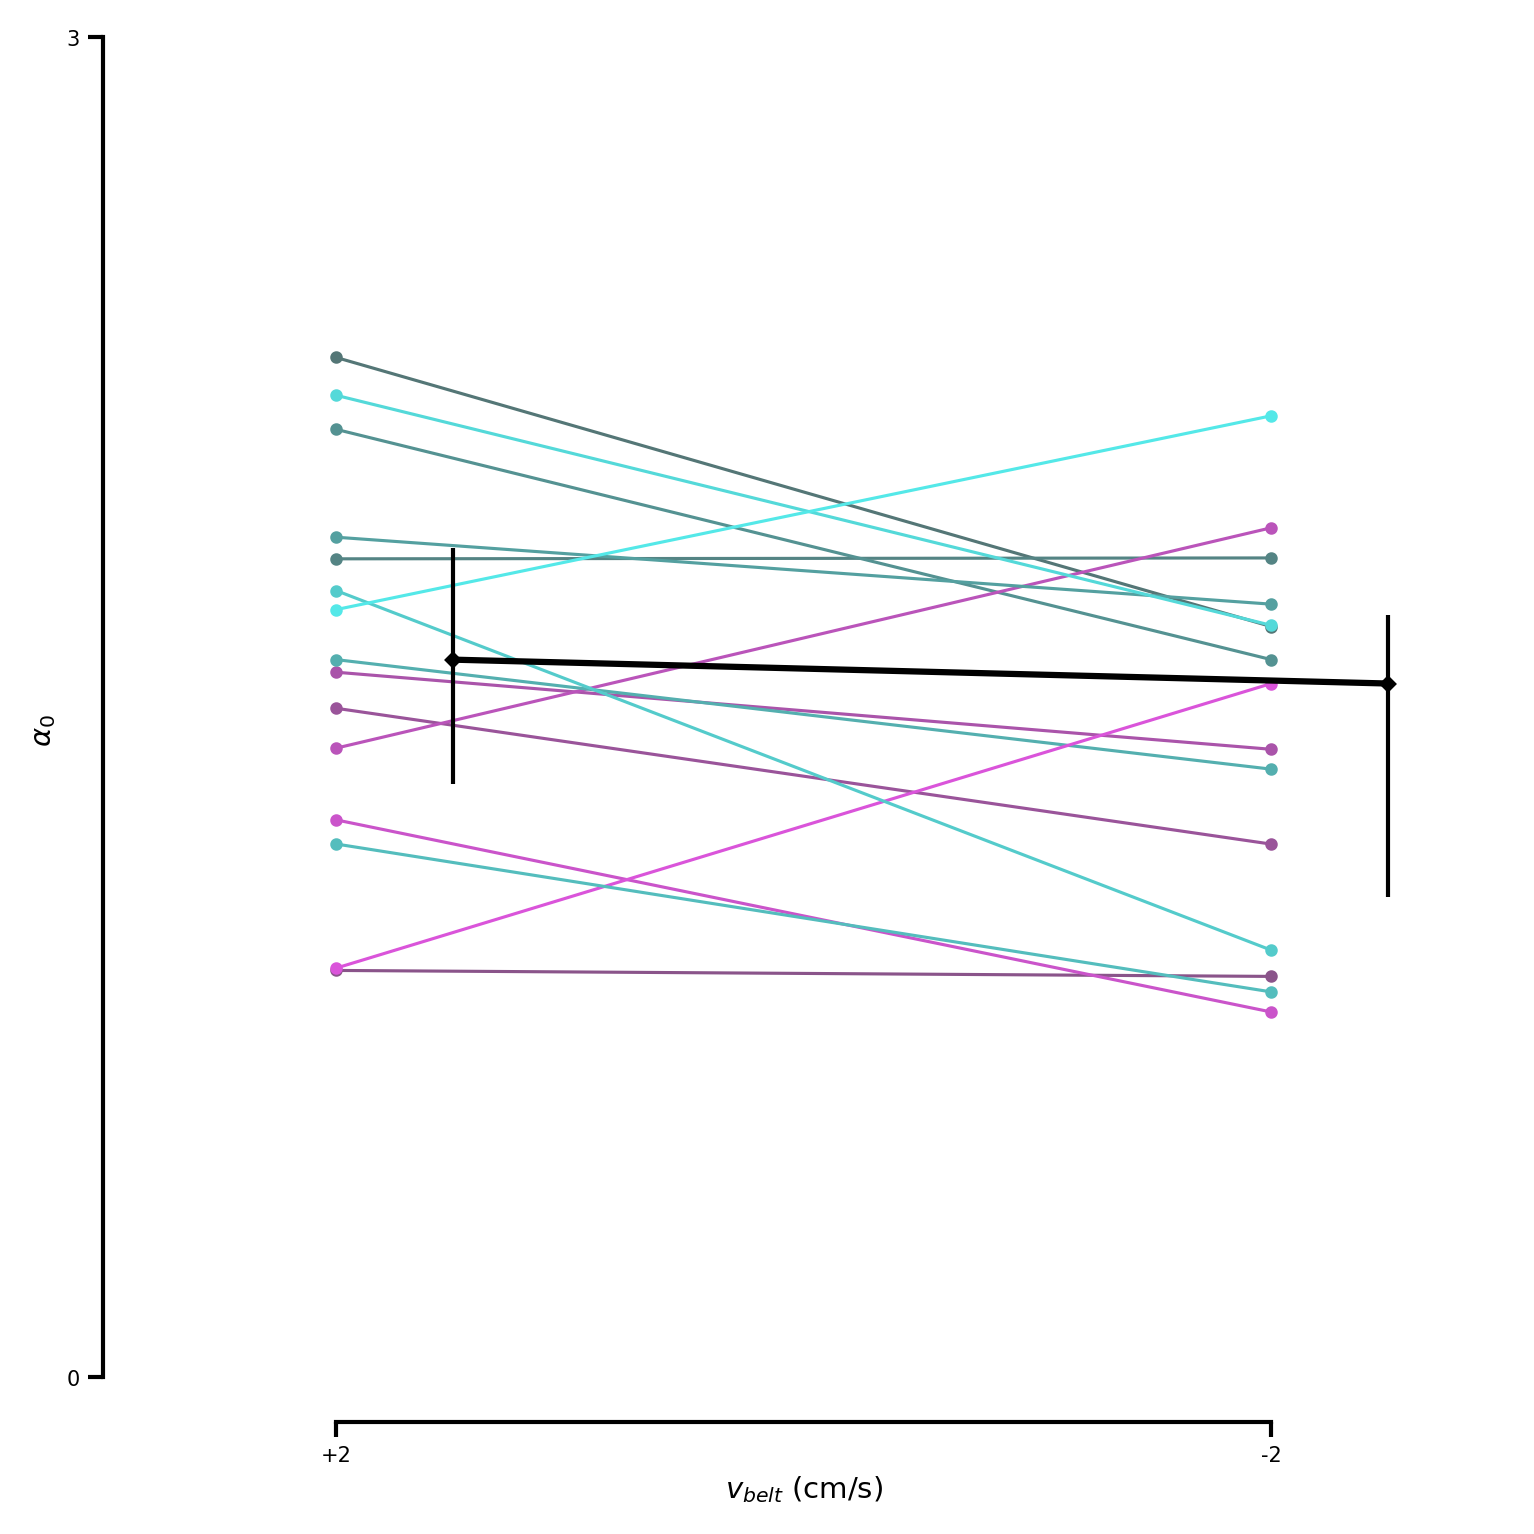

In [ ]:
# Plot the parameters
def plotmedian2rev2(var, ax=None, dist_or_tm='dist', do=True, animalList=[], shift_tm=False, err=None, label=False):
    if do:

        if ax is None:
            fig, ax = plt.subplots(1, 1, figsize=(cm2inch(4), cm2inch(4)))

        shift = .125

        if animalList == []:
            animalList = list(var.keys())

        if shift_tm:
            x = [3 + shift, 4 + shift]
        else:
            x = [0 + shift, 1 + shift]

        y = [np.median([var[animal]["2"] for animal in animalList]),
             np.median([var[animal]["rev2"] for animal in animalList])]

        if err is not None:
            if err == 'sem':
                err = [stats.sem([var[animal]["2"] for animal in animalList]),
                        stats.sem([var[animal]["rev2"] for animal in animalList])]
            
            elif err == 'std':
                err = [np.std([var[animal]["2"] for animal in animalList]),
                        np.std([var[animal]["rev2"] for animal in animalList])]
            
            elif err == 'percentile':
                bot, top = 25, 75
                err = []

                for cond in ['2', 'rev2']:
                    median = np.median([var[animal][cond] for animal in animalList])
                    percentile_bot = np.percentile([var[animal][cond] for animal in animalList], bot)
                    percentile_top = np.percentile([var[animal][cond] for animal in animalList], top)
                    err.append([median - percentile_bot, percentile_top - median])
                err = np.array(err).T
            else:
                err = [0, 0]
        
        if label:
            ax.errorbar(x, y, yerr=err, capsize=0,
                        color='k', marker='D', markersize=2, linestyle='-', lw=1.5, elinewidth=1,
                        label=f'Median (n={len(animalList)})', zorder=100)
        else:
            ax.errorbar(x, y, yerr=err, capsize=0, color='k', marker='D', 
                        markersize=2, linestyle='-', lw=1.5, elinewidth=1, zorder=100)
            

def FigureS15AB(var, yticks=[0, 1], name ='', show_xlabel=False, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    for animal in animalList:
        ax.plot([0, 1], [var[animal]["2"], var[animal]["rev2"]], 
                        color=rat_markers[animal][0], marker=rat_markers[animal][1], lw=.75,
                        markersize=2, zorder=5)
    
    ax.plot([-100, -101], [-100, -101], color='k', marker='D', markersize=2, linestyle='-', lw=1.5, label=f'Median', zorder=5)


    ax.set_xlim(0, 1)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["+2", "-2"])
    if show_xlabel:
        _ = r'$v_{belt}$'
        ax.set_xlabel(f'{_} (cm/s)')

    ax.set_ylim(yticks[0], yticks[1])
    ax.set_yticks(yticks)
    ax.set_ylabel(name)

    space_axes(ax, x_ratio_left=.25, x_ratio_right=.25)
    plotmedian2rev2(var, ax=ax, dist_or_tm='tm', animalList=animalList, err='percentile')

    _ = np.asarray([var[animal]["2"] for animal in animalList])
    __ = np.asarray([var[animal]["rev2"] for animal in animalList])
    perm = exact_mc_perm_paired_test(_, __)
    ymax = max([var[animal]["2"] for animal in animalList] + [var[animal]["rev2"] for animal in animalList])
    return perm, ymax


FigureS15AB(alpha, yticks=[0, 3], name=r'$\alpha_0$', show_xlabel=True)

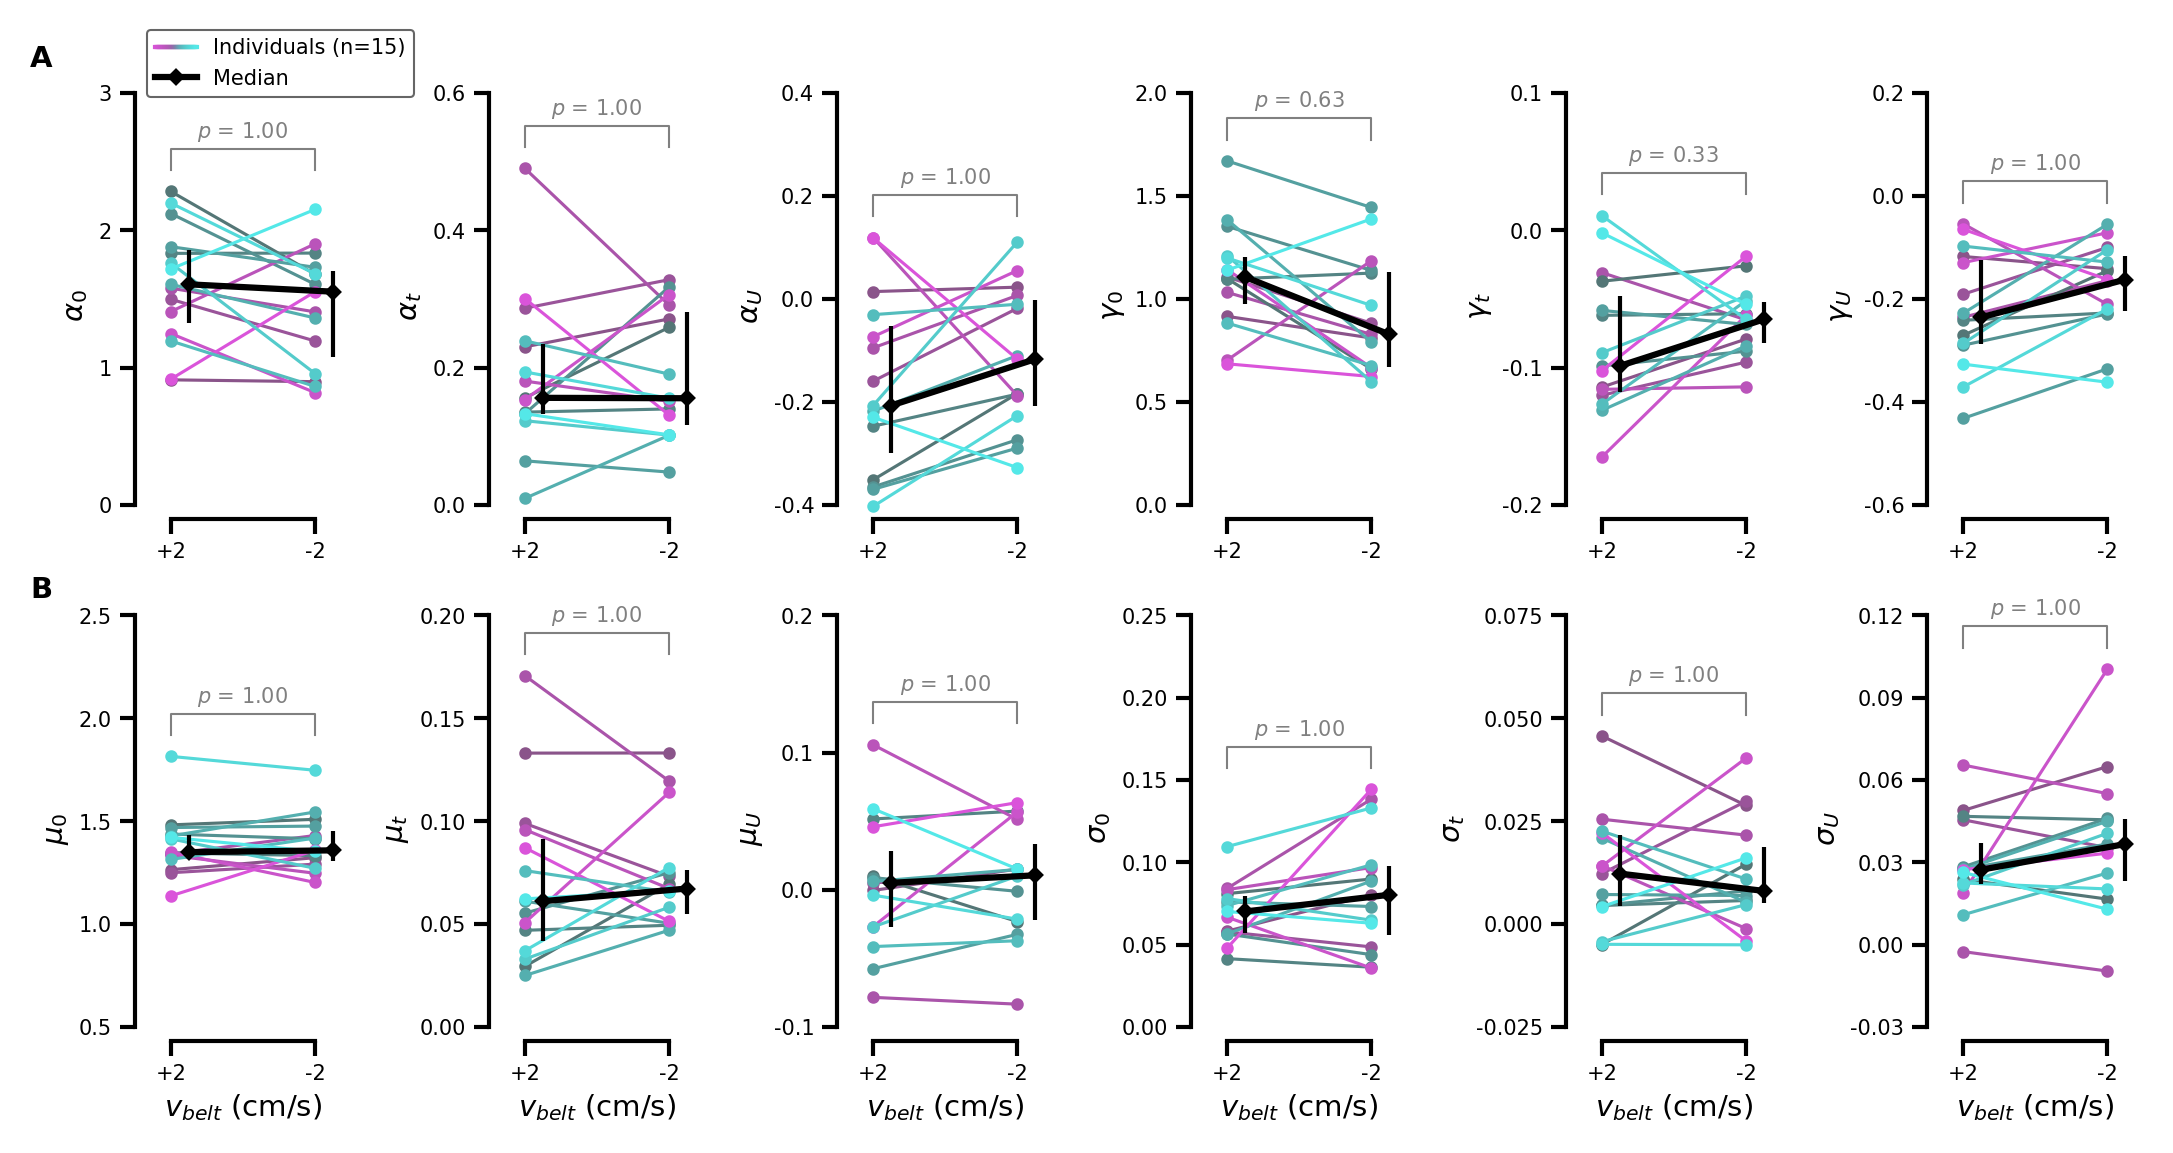

In [7]:

fig, axs = plt.subplots(2, 6, figsize=(cm2inch(18), cm2inch(9)))
p_vals = np.zeros((12))
y_max = np.zeros((12))
for i, (var, yticks, name, ax) in enumerate(zip(vars, yticks, names, axs.ravel())):
    p_vals[i], y_max[i] = FigureS15AB(var, yticks=yticks, name=name, ax=ax, show_xlabel=True if i>=6 else False)

sig, corrected_pvalues, alphabonf = multipletests_bonferroni(p_vals)
for ax, cp_val, ymax in zip(axs.ravel(), corrected_pvalues, y_max):
    barplot_annotate_brackets(ax, 0, 1, cp_val, [0, 1], [ymax, ymax], maxasterix=None)

figuresLabels={"A":[0.00, 1.00], "B":[0.00, 0.50]}

for label,coordinates in sorted(figuresLabels.items()):
    fig.text(coordinates[0], coordinates[1], label, figure=fig, 
             weight='bold', fontsize=7, ha='left', va='bottom', color='k')

handles, labels = axs[0, 0].get_legend_handles_labels()
add_colored_intact(axs[0, 0], handles=[handles], labels=['Median'], on_fig=True,
                   text=f'Individuals (n={len(animalList)})', loc='upper left', bbox=(0.05, 1.05))


plt.savefig("./Figures_paper/Figure_S15.pdf", facecolor='w', 
                edgecolor='none', bbox_inches='tight', format="pdf", dpi=600)

plt.savefig("./Figures_paper/Figure_S15.svg", facecolor='w', 
                edgecolor='none', bbox_inches='tight', format="svg", dpi=600)
